In [1117]:
# Hinweise zum Einlesen
import keras
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

train_val = pd.read_csv('titanic_data/train.csv')
test_data = pd.read_csv('titanic_data/test.csv')

In [1118]:
length = int(len(train_val) * 0.8)
train_dataset = train_val[:length]
validation_dataset = train_val[length:]

print(train_dataset.head(5))
pd.crosstab(train_dataset['Pclass'], train_dataset['Survived'])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Survived,0,1
Pclass,,
1,68,107
2,75,72
3,291,99


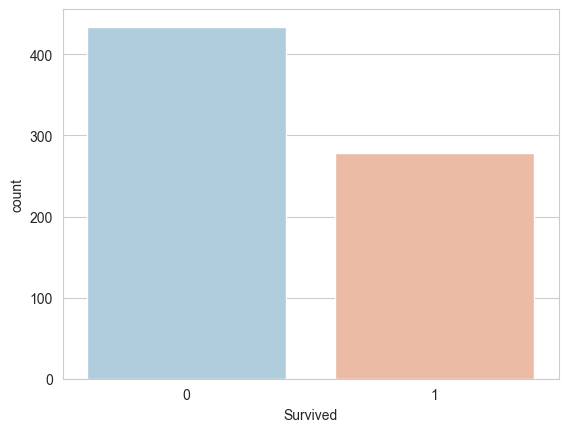

In [1119]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_dataset,palette='RdBu_r');

In [1120]:
print('\n--------Trainings DataSet 80%---------\n')
survived_value_counts = train_dataset.groupby('Pclass').Survived.value_counts()
survived_percentage = train_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

print()
print(survived_value_counts)
print()
print(survived_percentage)
print()
print('accuracy Train Data: ', sum(survived_value_counts.to_list()[::2])/ sum(survived_value_counts.to_list()))


--------Trainings DataSet 80%---------


Pclass  Survived
1       1           107
        0            68
2       0            75
        1            72
3       0           291
        1            99
Name: Survived, dtype: int64

   Pclass  Survived
0       1  0.611429
1       2  0.489796
2       3  0.253846

accuracy Train Data:  0.6643258426966292


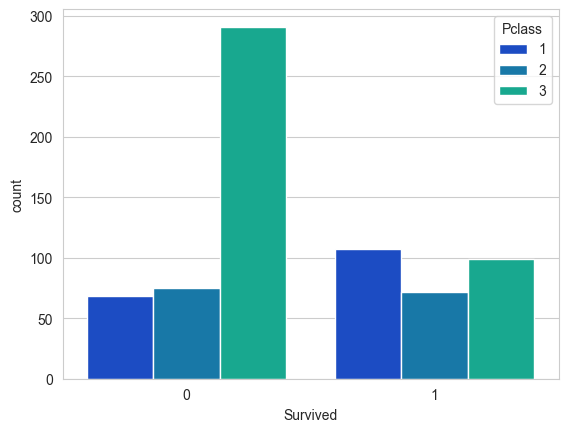

In [1121]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_dataset,palette='winter');


In [1122]:
val_survived_value_counts = validation_dataset.groupby('Pclass').Survived.value_counts()
val_survived_percentage = validation_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

print('\n--------Validation DataSet 20%---------\n')
print(val_survived_value_counts)
print()
print(val_survived_percentage)
print()
print('accuracy Validation Data: ', sum(val_survived_value_counts.to_list()[::2])/ sum(val_survived_value_counts.to_list()))


--------Validation DataSet 20%---------

Pclass  Survived
1       1           29
        0           12
2       0           22
        1           15
3       0           81
        1           20
Name: Survived, dtype: int64

   Pclass  Survived
0       1  0.707317
1       2  0.405405
2       3  0.198020

accuracy Validation Data:  0.7374301675977654


In [1123]:
print('\n---survived male female---\n')

print(pd.pivot_table(train_dataset, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
women = train_dataset.loc[train_dataset.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print()
print("% of women who survived:", rate_women)
men = train_dataset.loc[train_dataset.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print()
print("% of men who survived:", rate_men)


---survived male female---

Sex       female  male
Survived              
0             66   368
1            190    88


% of women who survived: 0.7421875

% of men who survived: 0.19298245614035087


<AxesSubplot:xlabel='Survived', ylabel='count'>

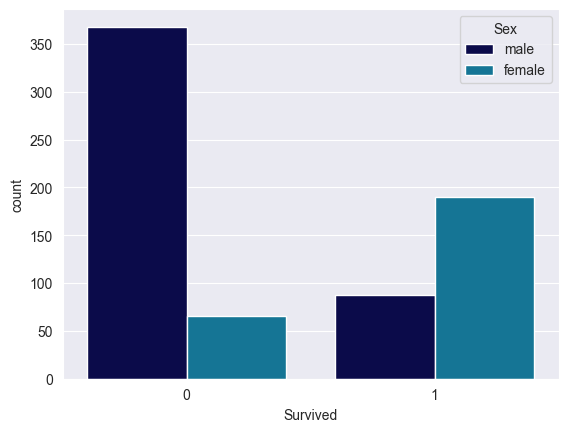

In [1124]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train_dataset,palette='ocean')

c:\users\akkarin\documents\06_semester\ai\aufgabe_4_ml\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

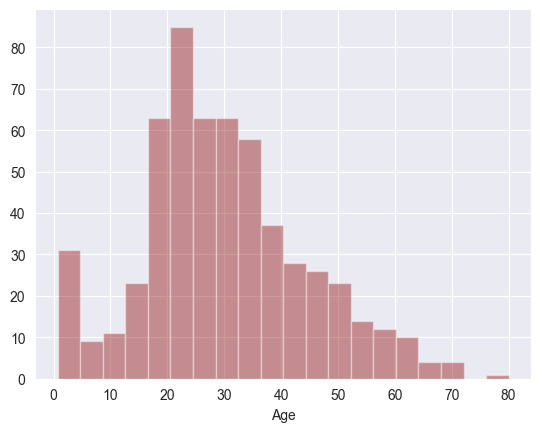

In [1125]:
sns.distplot(train_dataset['Age'].dropna(),kde=False,color='darkred',bins=20)

In [1126]:
validation_dataset["Age"].fillna(train_dataset["Age"].median(skipna=True), inplace=True)
train_dataset["Age"].fillna(train_dataset["Age"].median(skipna=True), inplace=True)

train_dataset.isnull().sum()

c:\users\akkarin\documents\06_semester\ai\aufgabe_4_ml\venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\akkarin\documents\06_semester\ai\aufgabe_4_ml\venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          550
Embarked         1
dtype: int64

In [1127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

y = train_dataset["Survived"]
Y_test = validation_dataset["Survived"]
features = ["Pclass", "Sex", "Age"]
X = pd.get_dummies(train_dataset[features])
X_test = pd.get_dummies(validation_dataset[features])
print(X_test)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model = LogisticRegression()

model.fit(X, y)
predictions = model.predict(X_test)

     Pclass   Age  Sex_female  Sex_male
712       1  48.0           0         1
713       3  29.0           0         1
714       2  52.0           0         1
715       3  19.0           0         1
716       1  38.0           1         0
..      ...   ...         ...       ...
886       2  27.0           0         1
887       1  19.0           1         0
888       3  28.0           1         0
889       1  26.0           0         1
890       3  32.0           0         1

[179 rows x 4 columns]


In [1128]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(Y_test, predictions))

print('accuracy logistische Regression', accuracy_score(Y_test, predictions)*100)


              precision    recall  f1-score   support

           0       0.83      0.89      0.86       115
           1       0.77      0.67      0.72        64

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179

accuracy logistische Regression 81.00558659217877


In [1129]:
output = pd.DataFrame({'PassengerId': validation_dataset.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [1130]:
#Sie können von folgendem Code starten um das Netzwerk zu definieren, füllen Sie die ...
from keras import Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add(Dense(10, activation='sigmoid', batch_input_shape=(None, 4))) #We have 4 input features

model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 11        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [1131]:
features = ["Pclass", "Sex", "Age"]
X_val = pd.get_dummies(validation_dataset[features])
Y_val = validation_dataset["Survived"]

Epoch 30/50
178/178 - 0s - loss: 0.4997 - accuracy: 0.7837 - val_loss: 0.4591 - val_accuracy: 0.7989
Epoch 31/50
178/178 - 0s - loss: 0.4973 - accuracy: 0.7837 - val_loss: 0.4537 - val_accuracy: 0.7989
Epoch 32/50
178/178 - 0s - loss: 0.4949 - accuracy: 0.7837 - val_loss: 0.4521 - val_accuracy: 0.7989
Epoch 33/50
178/178 - 0s - loss: 0.4911 - accuracy: 0.7851 - val_loss: 0.4577 - val_accuracy: 0.7989
Epoch 34/50
178/178 - 0s - loss: 0.4912 - accuracy: 0.7837 - val_loss: 0.4461 - val_accuracy: 0.7989
Epoch 35/50
178/178 - 0s - loss: 0.4900 - accuracy: 0.7837 - val_loss: 0.4454 - val_accuracy: 0.7989
Epoch 36/50
178/178 - 0s - loss: 0.4896 - accuracy: 0.7851 - val_loss: 0.4424 - val_accuracy: 0.7989
Epoch 37/50
178/178 - 0s - loss: 0.4862 - accuracy: 0.7837 - val_loss: 0.4396 - val_accuracy: 0.7989
Epoch 38/50
178/178 - 0s - loss: 0.4855 - accuracy: 0.7837 - val_loss: 0.4384 - val_accuracy: 0.7989
Epoch 39/50
178/178 - 0s - loss: 0.4836 - accuracy: 0.7837 - val_loss: 0.4376 - val_accurac

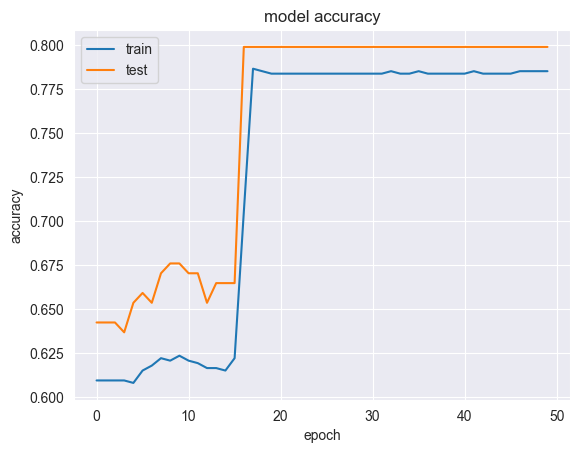

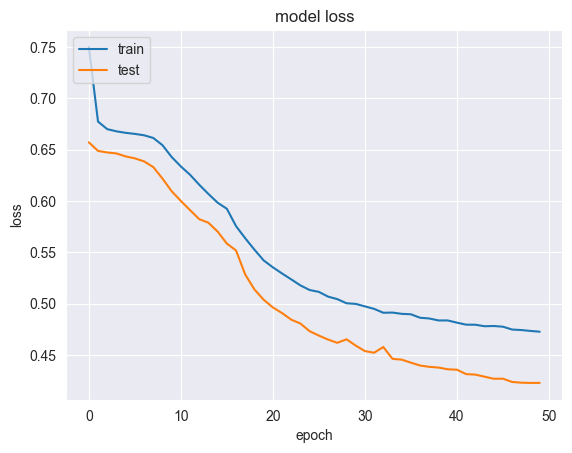

Epoch 1/50
178/178 - 1s - loss: 0.6850 - accuracy: 0.5632 - val_loss: 0.6460 - val_accuracy: 0.6760
Epoch 2/50
178/178 - 0s - loss: 0.6599 - accuracy: 0.6264 - val_loss: 0.6236 - val_accuracy: 0.6704
Epoch 3/50
178/178 - 0s - loss: 0.6419 - accuracy: 0.6264 - val_loss: 0.6003 - val_accuracy: 0.6760
Epoch 4/50
178/178 - 0s - loss: 0.6211 - accuracy: 0.6390 - val_loss: 0.5822 - val_accuracy: 0.6760
Epoch 5/50
178/178 - 0s - loss: 0.6079 - accuracy: 0.6657 - val_loss: 0.5717 - val_accuracy: 0.7933
Epoch 6/50
178/178 - 0s - loss: 0.5953 - accuracy: 0.7233 - val_loss: 0.5536 - val_accuracy: 0.6983
Epoch 7/50
178/178 - 0s - loss: 0.5833 - accuracy: 0.7388 - val_loss: 0.5397 - val_accuracy: 0.8324
Epoch 8/50
178/178 - 0s - loss: 0.5670 - accuracy: 0.7781 - val_loss: 0.5225 - val_accuracy: 0.8212
Epoch 9/50
178/178 - 0s - loss: 0.5511 - accuracy: 0.7823 - val_loss: 0.5046 - val_accuracy: 0.8212
Epoch 10/50
178/178 - 0s - loss: 0.5362 - accuracy: 0.7837 - val_loss: 0.4885 - val_accuracy: 0.8212

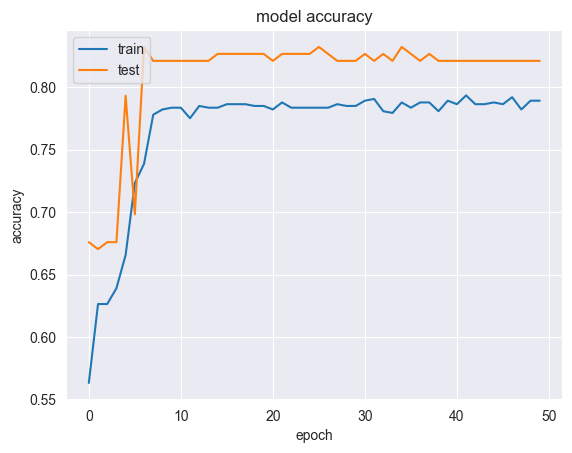

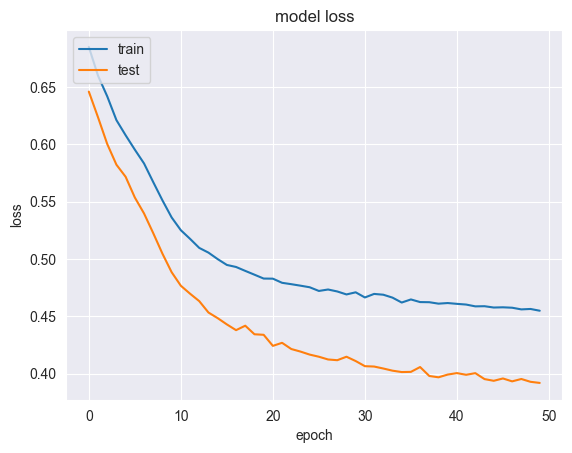

In [1132]:
history= model.fit(X,y, batch_size=4, epochs=50, verbose=2, validation_data=(X_val,Y_val))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


